In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from seaborn import distplot

In [2]:
def plot_hist(input_file,input_image,output_image):
    """
    input : input_file_path, input_image, output_image
    output : saves the histograms for both the images for comparison
    dependencies : seaborn, numpy, matplotlib
    """
    name = input_file.split(".")[2]
    plt.figure()
    plt.title("Normalized Histogram Plots for Images")
    ax = distplot(input_image,color='r',label ="Input Histogram",hist_kws={"alpha": 0.3, "linewidth": 1.5},bins=256,hist=False)
    ax = distplot(output_image,color="b",label ="BiHistogram Histogram",hist_kws={"alpha": 0.3,"linewidth": 1.5},bins=256,hist=False)
    l1 = ax.lines[0]
    x1 = l1.get_xydata()[:,0]
    y1 = l1.get_xydata()[:,1]
    ax.fill_between(x1,y1, color="red", alpha=0.3)
    l2 = ax.lines[1]
    x2 = l2.get_xydata()[:,0]
    y2 = l2.get_xydata()[:,1]
    ax.fill_between(x2,y2, color="blue", alpha=0.3)
    plt.legend()
    plt.savefig(".."+name+"BiHistHistogram.png",bbox_inches="tight",pad=-1)

def mySubHE (input_file):
    
    name = input_file.split(".")[2]
    image = cv2.imread(input_file)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    
    hsv_image = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    h,s,v = cv2.split(hsv_image)

    rows,columns=image.shape[:2]
    
    output_image = v.copy();
    intensity_freq = np.zeros((256,1))
    intensity_prob = np.zeros ((256,1))
    intensity_cdf  = np.zeros((256,1))

    for i in range(rows):
        for j in range(columns):
            x=int(v[i,j])
            if x>255:
                x=255
            intensity_freq[x]=intensity_freq[x]+1
        

    mean_val=np.mean(v)
    median_val=np.median(v)

    lastval=int(median_val)
    firstval=lastval+1

    subh1= intensity_freq[0:int(lastval)+1]
    subh2 = intensity_freq[int(firstval) : 256 ]

    cdf1 = equalize(v,output_image,subh1,0,lastval)
    cdf2 = equalize(v,output_image,subh2,firstval,255)


    for i in range(rows):
        for j in range(columns):
            x=int(v[i,j])
            if x>255:
                x=255
            
            if x<=lastval:
                output_image[i,j]= 1+ (lastval-1)*cdf1[x]
            elif x>lastval:
                output_image[i,j]= firstval+(255-firstval)*cdf2[x-lastval]
    
    plot_hist(input_file,v,output_image)
    hsv_image[:,:,2] = output_image            
    output_image = cv2.cvtColor(hsv_image,cv2.COLOR_HSV2RGB)
           
    fig,axes = plt.subplots(1,2, constrained_layout=True, gridspec_kw={'width_ratios':[1,1]})
    axes[0].imshow(image,cmap="gray")
    axes[0].axis("on")
    im = axes[1].imshow(output_image,cmap="gray")
    axes[1].axis("on")
    plt.imshow(output_image,cmap="gray")
    cbar = fig.colorbar(im,ax=axes.ravel().tolist(),shrink=0.45)
    
    plt.savefig(".."+name+"SUBHEcombined.png",bbox_inches="tight",pad=-1)
    plt.imsave(".." +name +"SUBHE.png",output_image,cmap="gray")
        
        
def equalize(image,output_image,hist_,val1,val2):
    

    rows,columns=image.shape

    num_samples = np.sum(hist_)
    intensity_prob = np.zeros((val2-val1+2,1));
    intensity_cdf = np.zeros((val2-val1+2,1));

    for i in range(rows):
        for j in range(columns):
            x=int(image[i,j]);
            if x > val1 and x <=val2:
                intensity_prob[x-val1]= hist_[x-val1]/num_samples;
   
    a,b=intensity_cdf.shape;
    for j in range(len(intensity_cdf)):
        intensity_cdf[j] = np.sum(intensity_prob[1:j]);
        
    return intensity_cdf


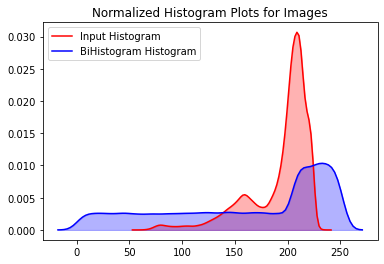

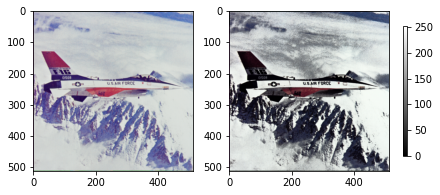

In [3]:
file_path = '../data/f16.tiff'
mySubHE(file_path)
# file_path='../2/data/chestXray.png'
# image1 = cv2.imread(file_path,2)
# mySubHE(image1,file_path);

100%|██████████| 512/512 [00:01<00:00, 394.75it/s]


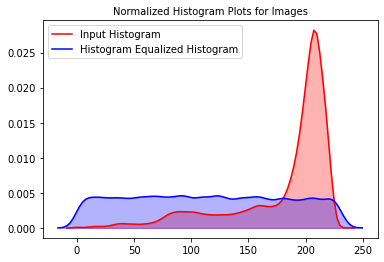

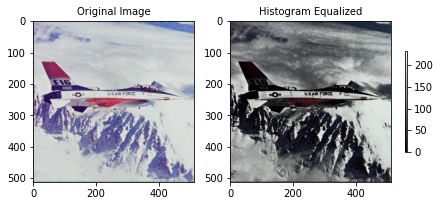

In [4]:
from myHE import myHE
myHE(file_path)